# What are Diagnostic Plots and its Uses?
- Diagnostic plots help us determine visually how our model is fitting the data and also in recognising if any of our basic assumptions in OLS(Ordinary Least Squares) model are being violated.
- We will be focusing on the **residuals**(errors) of our model.
- $r_i=y_i-\hat{y}_i$.

**Some of the assumptions about the model and data are:**
- The data can be fit by a line.
- Errors are normally distributed.( This means that the data itself is normally distributed).
- Errors have a constant variance.(Homoscedasticity)
- There are no High Leverage points.


## Testing our Assumptions through Plots

### Residuals vs Fitted Values

**Things to be observed in this plot:**
- This graph shows if there are any non-linear patterns in residuals, and thus in the data as well.
- One of the mathematical assumptions in building OLS model is that the data can be fit by a line.
- If this assumptions hold true and if the data can be fit by a line we should see a relativly flat line when looking at residuals vs fitted.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import statsmodels.formula.api as smf
import scipy.stats as stats

style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/Repos/Git/Machine-Learning/An Introduction to Statistical Learning/Dataset/Auto.csv')

In [3]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [0]:
data.horsepower.replace('?',np.nan,inplace=True)
data.dropna(inplace=True)
data.horsepower = data.horsepower.astype(np.int64)

In [5]:
model = smf.ols('mpg~horsepower',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 18 May 2020   Prob (F-statistic):           7.03e-81
Time:                        15:56:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

***Fitted vs Residuals Values***

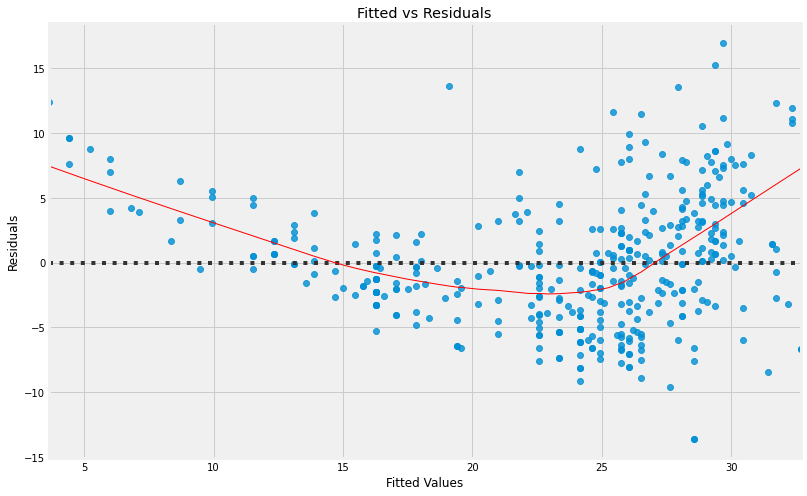

In [6]:
plt.figure(figsize=(12,8))
plt.title('Fitted vs Residuals')
sns.residplot(model.fittedvalues,model.resid,lowess=True,line_kws={'color':'r','lw':1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Observation:**
- We can observe a clear pattern in the data.
- From the pattern we can conclude that the model is not a perfect fit for the data.
- The U-shape shows that we have underfitted the model.
- The data doesn't follow a linear pattern.

***How does an ideal residual vs fitted plot look like?***
- The red line would follow the black dotted line and should be horizondal.


***Checking if our observations are in sync with the given data***

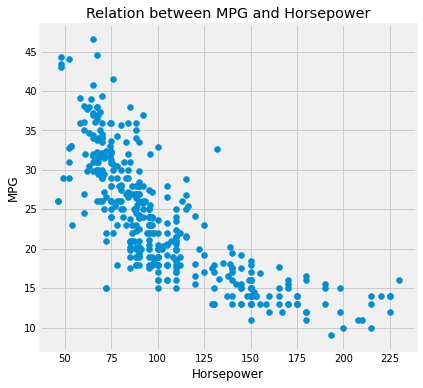

In [7]:
plt.figure(figsize=(6,6))
plt.title('Relation between MPG and Horsepower')
plt.scatter(data.horsepower,data.mpg)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

**How our linear model fit the data can be observed from the plot**

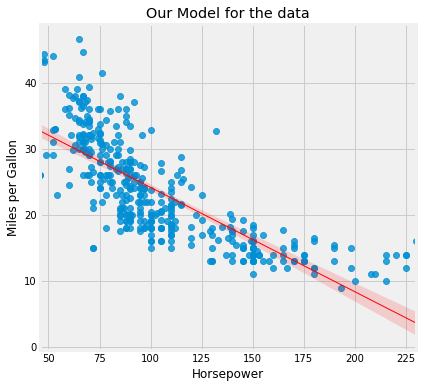

In [8]:
plt.figure(figsize=(6,6))
plt.title('Our Model for the data')
sns.regplot(data.horsepower,data.mpg,order=1,lowess=False,scatter=True,line_kws={'color':'r','lw':1},label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.show()

**Observation:**
- We can clearly see that our model is not a proper fit for the data.


**How our model should fit the data**

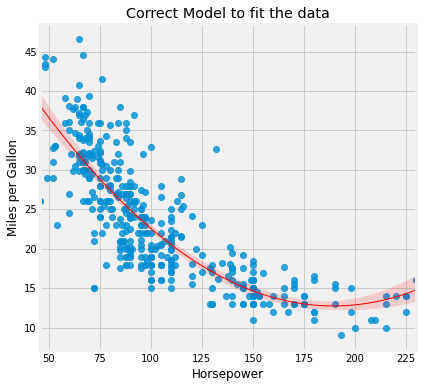

In [9]:
plt.figure(figsize=(6,6))
plt.title('Correct Model to fit the data')
sns.regplot(data.horsepower,data.mpg,order=2,lowess=False,scatter=True,line_kws={'color':'r','lw':1},label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.show()

**Observation:**
- From this we can see a much better fit of our model to the given data.

**Corrected Model**

In [10]:
corrected_model = smf.ols('mpg~horsepower+I(horsepower**2)',data).fit()
print(corrected_model.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.686    
Dependent Variable:  mpg              AIC:                2272.3535
Date:                2020-05-18 15:56 BIC:                2284.2673
No. Observations:    392              Log-Likelihood:     -1133.2  
Df Model:            2                F-statistic:        428.0    
Df Residuals:        389              Prob (F-statistic): 5.40e-99 
R-squared:           0.688            Scale:              19.131   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          56.9001   1.8004  31.6037 0.0000 53.3603 60.4399
horsepower         -0.4662   0.0311 -14.9782 0.0000 -0.5274 -0.4050
I(horsepower ** 2)  0.0012   0.0001  10.0801 0.0000  0.0010  0.0015
------------------------------------------------------------------

**Observation:**
- We can still Observe that the model is siginificant.

**Residuals vs Fitted Plot for Corrected Model**

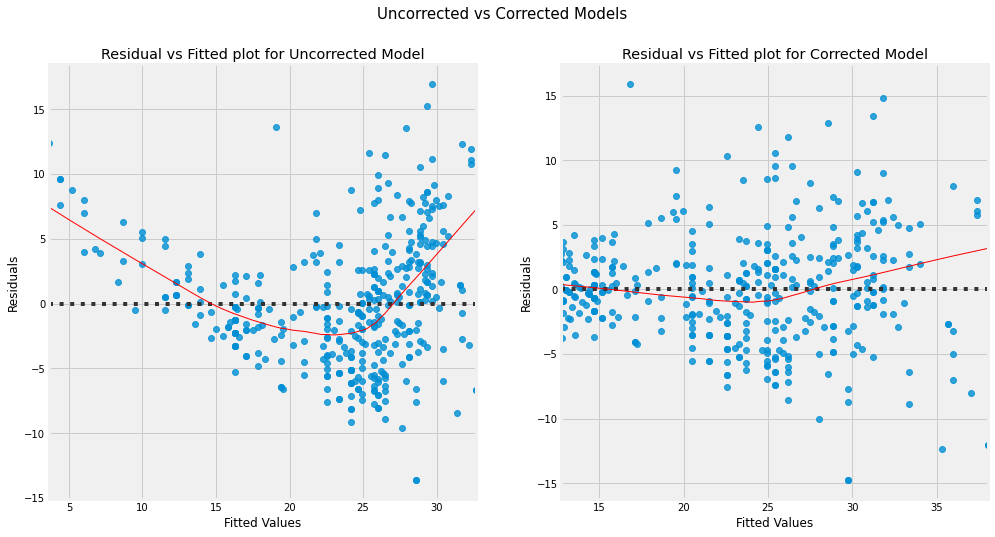

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Uncorrected vs Corrected Models',fontsize=15)

# Not Corrected model
ax[0].set_title('Residual vs Fitted plot for Uncorrected Model')
sns.residplot(model.fittedvalues,model.resid,lowess=True,line_kws={'color':'r','lw':1},ax=ax[0])
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')

# Corrected Model
ax[1].set_title('Residual vs Fitted plot for Corrected Model')
sns.residplot(corrected_model.fittedvalues,corrected_model.resid,lowess=True,line_kws={'color':'r','lw':1},ax=ax[1])
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Residuals')

plt.show()

**Observation**
- We can note that we have improved the fit of the model considerably from the uncorrected model.
- Still there is room for improvement.

### Probplot

**Things to be observed in this plot:**
- The blue dots should fit along the redline.

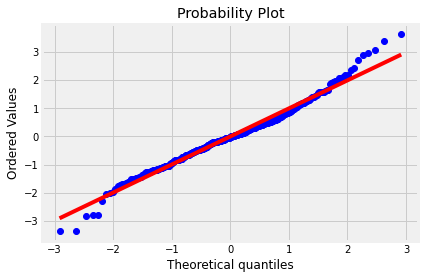

In [12]:
stats.probplot(corrected_model.get_influence().resid_studentized_internal,plot=plt)
plt.show()

**Observations:**
- Looking at the graph, we can observe that there are several points away from the line both at the start and the end.
- This is an indication that the errors are not normally distributed, thereby telling us that the data itself is not normally distributed.
- This says that we are more likely to see extreme values that to be expected if the data was truly normally distributed.

In [0]:
data['lmpg'] = np.log(data.mpg)
data['smpg'] = np.sqrt(data.mpg)

In [0]:
l_corrected_model = smf.ols('lmpg~horsepower+I(horsepower**2)',data).fit()
s_corrected_model = smf.ols('smpg~horsepower+I(horsepower**2)',data).fit()

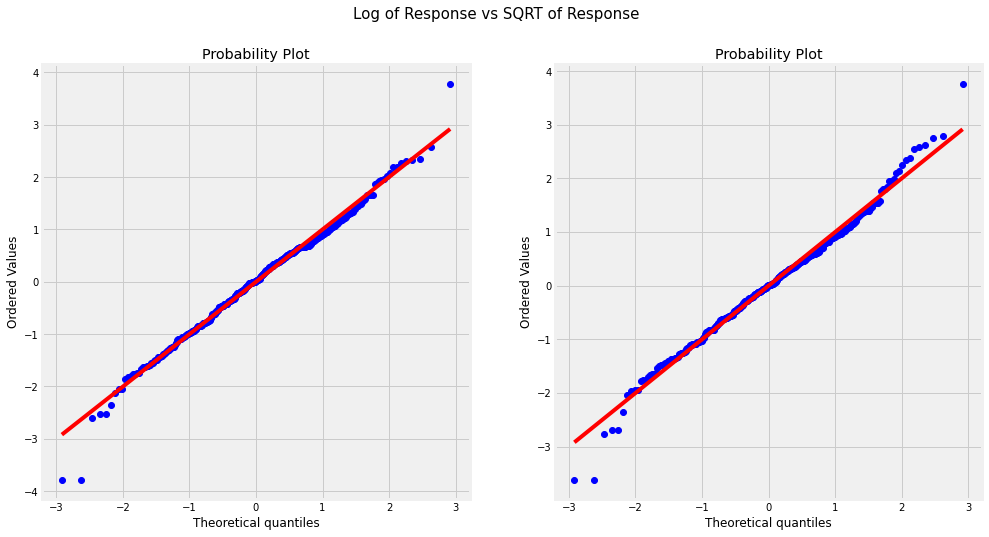

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

fig.suptitle('Log of Response vs SQRT of Response',fontsize=15)
# Log of MPG
ax[0].set_title('Log of the Response')
stats.probplot(l_corrected_model.get_influence().resid_studentized_internal,plot=ax[0],)

#Sqrt of mpg
ax[1].set_title('Sqrt of Response')
stats.probplot(s_corrected_model.get_influence().resid_studentized_internal,plot=ax[1])
plt.show()

**Observation:**
- We can see that we got a better normally distributed residuals when we used log of the response.

**Residual vs Fitted for Log of Response**

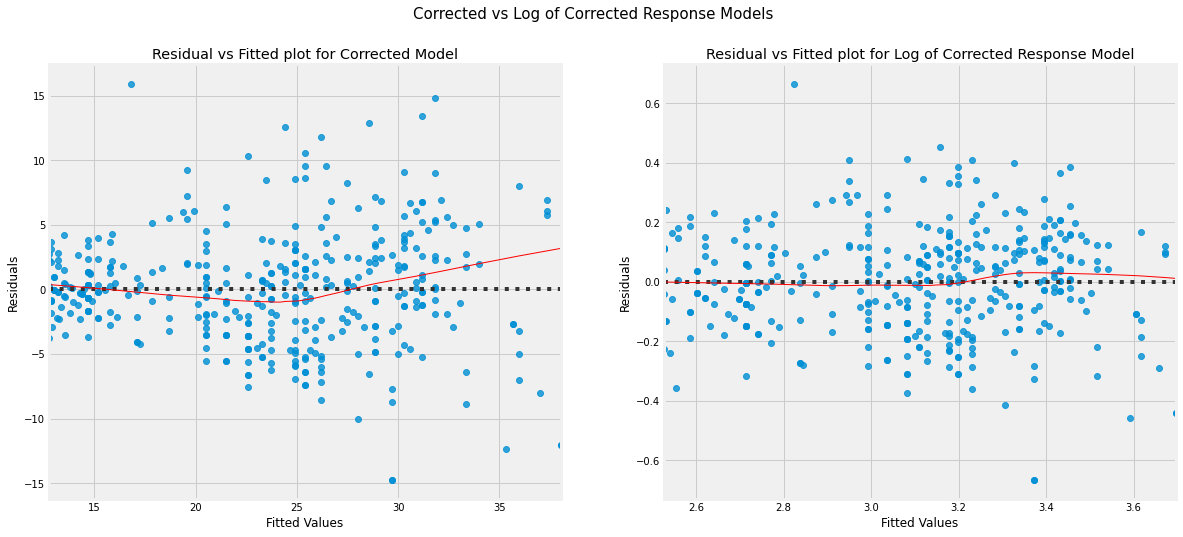

In [16]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
fig.suptitle('Corrected vs Log of Corrected Response Models',fontsize=15)

# Not Corrected model
ax[0].set_title('Residual vs Fitted plot for Corrected Model')
sns.residplot(corrected_model.fittedvalues,corrected_model.resid,lowess=True,line_kws={'color':'r','lw':1},ax=ax[0])
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')

# Corrected Model
ax[1].set_title('Residual vs Fitted plot for Log of Corrected Response Model')
sns.residplot(l_corrected_model.fittedvalues,l_corrected_model.resid,lowess=True,line_kws={'color':'r','lw':1},ax=ax[1])
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Residuals')

plt.show()

**Observation:**
- We can see a huge improvement in the model.

### Scale-Location plot

- This is a plot to check if the residuals suffer from non-constant variance aka homoscedasticity.

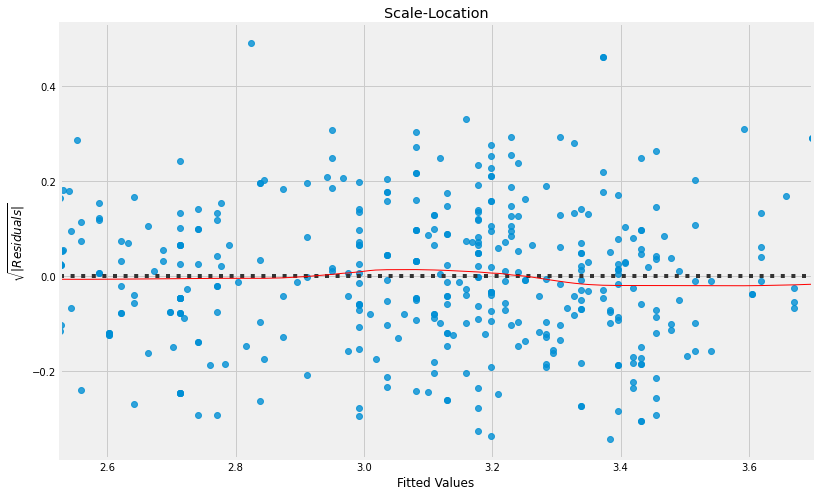

In [17]:
sqrt_abs_resid = np.sqrt(np.abs(l_corrected_model.resid))

plt.figure(figsize=(12,8))
plt.title('Scale-Location')
sns.residplot(l_corrected_model.fittedvalues,sqrt_abs_resid,lowess=True,line_kws={'color':'r','lw':1})
plt.xlabel('Fitted Values')
plt.ylabel(r'$\sqrt{|Residuals|}$')
plt.show()

**Observation:**
- We can observe that the residuals are spread with a constant variance.
- The Residuals are homoscedastic.

**Solutions:**
- If there are cases of ***Non Constant*** variance in the residuals, the there are a few methods to fix this issue.
- Some of the two most common methods for fixing hetroscedasticity are,
  - Weighted Least Squares method.
  - Heteroscedastic corrected covariance matrix.

### Residuals vs Leverage

- Leverage points, unlike outliers they dont have extreme $y$ values, however they have extreme $x$ values.
- This can have damaging effects on the model becase $\beta$ coefficients are very sensitive to leverage points.
- The purpose of leverage vs residuals plots are to identify these problematic observations.

In [0]:
model_leverage = l_corrected_model.get_influence().hat_matrix_diag
model_cooks_distance = l_corrected_model.get_influence().cooks_distance[0]

In [0]:
def graph(formula ,x_range, label=None):
  x = x_range
  y = formula(x)
  plt.plot(x,y,label=label,lw=1,ls='--',color='red')

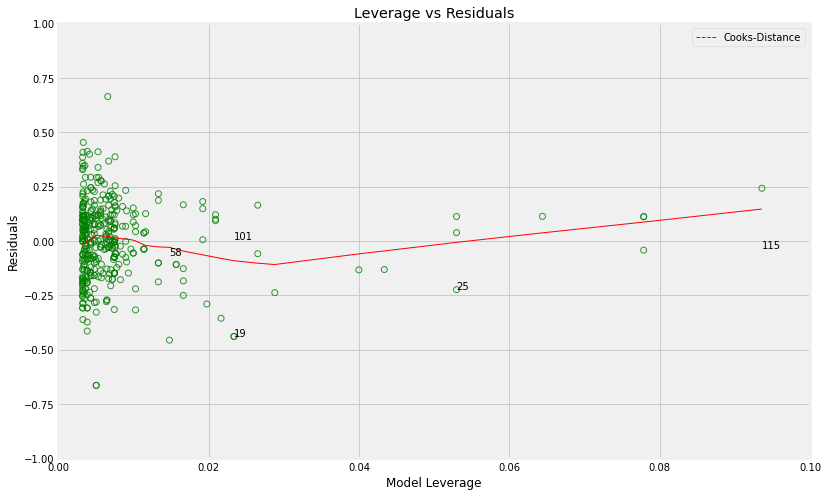

In [20]:
plt.figure(figsize=(12,8))
plt.title('Leverage vs Residuals')
sns.regplot(model_leverage,l_corrected_model.resid,scatter=True,line_kws={'color':'red','lw':1},lowess=True,ci=False,scatter_kws={'facecolor':'None','edgecolor':'green'})
plt.xlim(0,0.1)
plt.ylim(-1,1)
plt.xlabel('Model Leverage')
plt.ylabel('Residuals')

top_3 = np.flip(np.argsort(model_cooks_distance),0)[:5]
for i in top_3:
  plt.annotate(i,xy=(model_leverage[i],l_corrected_model.resid[i]))

p = len(l_corrected_model.params)
graph(lambda x: np.sqrt((0.5*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50),'Cooks-Distance')
graph(lambda x: np.sqrt((1*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50))

plt.legend(loc='best')

plt.show()